In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

DRUG_NAMES = ["CI-1040", "PD0325901","Refametinib","VX-11e","Afatinib","Pelitinib"]

### All Feature reduction method results

In [181]:
all_results = pd.DataFrame()

for drug in DRUG_NAMES:
    fr_results = pd.read_csv(f"data/Results/{drug}.csv")#, index_col = "Cell_line")
    fr_results.loc[:,"Drug"] = [drug for i in range(len(fr_results.index))]
    all_results = pd.concat([all_results,fr_results])

netphlix = pd.read_csv("data/Results/Netphix_results.csv", index_col = ["Drug","Methods"])
netphlix = netphlix.reset_index(drop = False)#.set_index("Drug")
netphlix = netphlix[netphlix["Methods"] == "No feature selection"][["Drug","SVM","Logistic Regression","MLP","Random Forest"]]
netphlix.loc[:,"Cell_line"] = ["Netphlix" for i in range(len(netphlix.index))]
all_results = pd.concat([all_results,netphlix], sort = True).rename(columns = {"Cell_line":"Methods"}).sort_values(by = ["Drug","Methods"])
all_results.set_index(["Drug","Methods"], inplace = True)
all_results

C:\Users\Asus\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Logistic Regression        MLP  \
Drug        Methods                                                           
Afatinib    Lasso Feature Selection                    56.190476  57.380952   
            Netphlix                                   60.714286  60.952381   
            No feature selection                       57.857143  60.476190   
            RFE Feature Selection                      56.904762  59.047619   
            Random Forest Feature Selection            60.000000  58.571429   
CI-1040     Lasso Feature Selection                    59.210526  56.052632   
            Netphlix                                   76.578947  76.578947   
            No feature selection                       58.947368  58.947368   
            Principal Component Analysis               61.200000  58.586000   
            RFE Feature Selection                      60.526316  58.684211   
            Random Forest Feature Selection            62.368421  59.473684   
PD0325901   Lasso Feature Selection                    65.263158  67.105263   
            Netphlix                                   73.684211  73.421053   
            No feature selection                       65.526316  64.736842   
            RFE Feature Selection                      64.736842  64.473684   
            Random Forest Feature Selection            66.315789  62.894737   
Pelitinib   Lasso Feature Selection                    53.493976  55.903614   
            Netphlix                                   52.771084  54.939759   
            No feature selection                       53.734940  56.626506   
            RFE Feature Selection                      52.289157  54.939759   
            Random Forest Feature Selection            55.662651  57.108434   
Refametinib Lasso Feature Selection                    64.634146  63.902439   
            Netphlix                                   76.341463  75.365854   
            No feature selection                       68.292683  65.365854   
            RFE Feature Selection                      62.926829  63.414634   
            Random Forest Feature Selection            66.341463  64.634146   
VX-11e      Lasso Feature Selection                    55.903614  57.108434   
            Netphlix                                   72.289157  71.084337   
            No feature selection                       55.180723  52.771084   
            RFE Feature Selection                      56.626506  57.108434   
            Random Forest Feature Selection            57.831325  57.831325   

                                             Random Forest        SVM  
Drug        Methods                                                    
Afatinib    Lasso Feature Selection              56.904762  54.523810  
            Netphlix                             60.952381  60.476190  
            No feature selection                 61.190476  60.238095  
            RFE Feature Selection                60.476190  61.428571  
            Random Forest Feature Selection      61.666667  63.333333  
CI-1040     Lasso Feature Selection              64.473684  60.526316  
            Netphlix                             76.315789  76.315789  
            No feature selection                 65.263158  60.789474  
            Principal Component Analysis         58.557900  59.624600  
            RFE Feature Selection                66.842105  61.578947  
            Random Forest Feature Selection      65.263158  62.631579  
PD0325901   Lasso Feature Selection              67.894737  68.157895  
            Netphlix                             72.631579  73.157895  
            No feature selection                 69.473684  65.000000  
            RFE Feature Selection                69.210526  67.894737  
            Random Forest Feature Selection      69.210526  66.052632  
Pelitinib   Lasso Feature Selection              56.626506  51.325301  
            Netphlix                             54.457831  58.072289

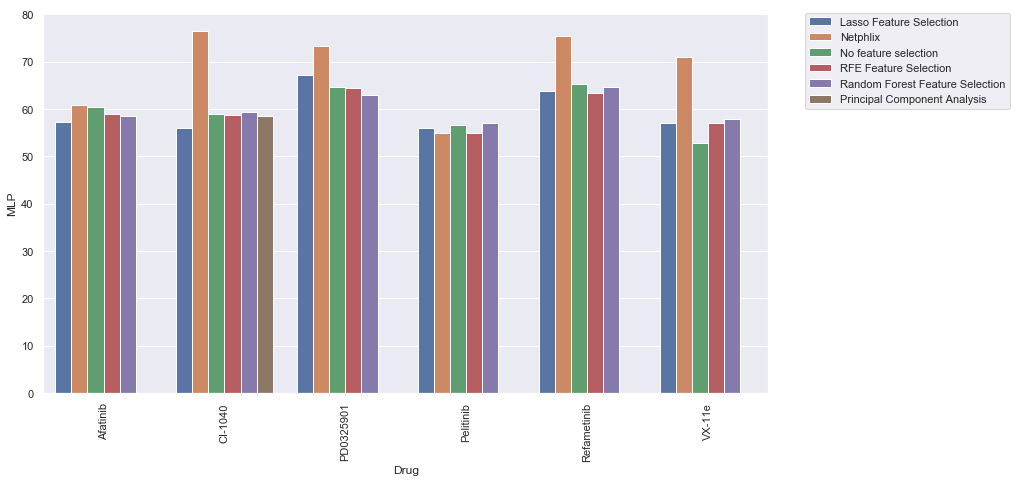

In [184]:
fig = plt.figure(figsize = (13,7))

sns.barplot(x = "Drug", y = "MLP", hue = "Methods", data = all_results.reset_index(drop = False))
plt.title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90);

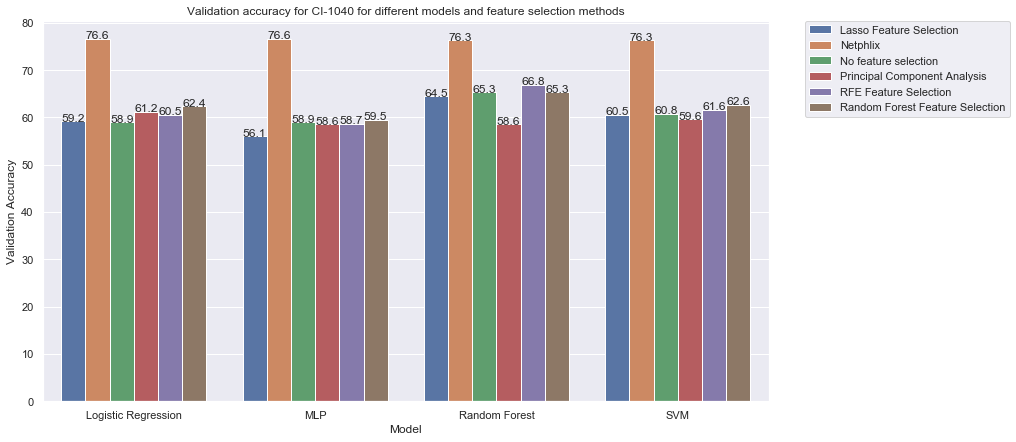

In [185]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

to_plot = all_results.reset_index(drop = False).melt(id_vars=['Drug','Methods'], value_vars = ['Logistic Regression','MLP','Random Forest','SVM'], var_name = 'Model', value_name = 'Validation Accuracy')
fig = plt.figure(figsize = (13,7))

DRUG = "CI-1040"

sns.barplot(x = "Model", y = "Validation Accuracy", hue = "Methods", data = to_plot[to_plot["Drug"] == DRUG])
plt.title(f"Validation accuracy for {DRUG} for different models and feature selection methods")
show_values_on_bars(plt.gca())

lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig(f"data/Results/Plots/{DRUG}_performances.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

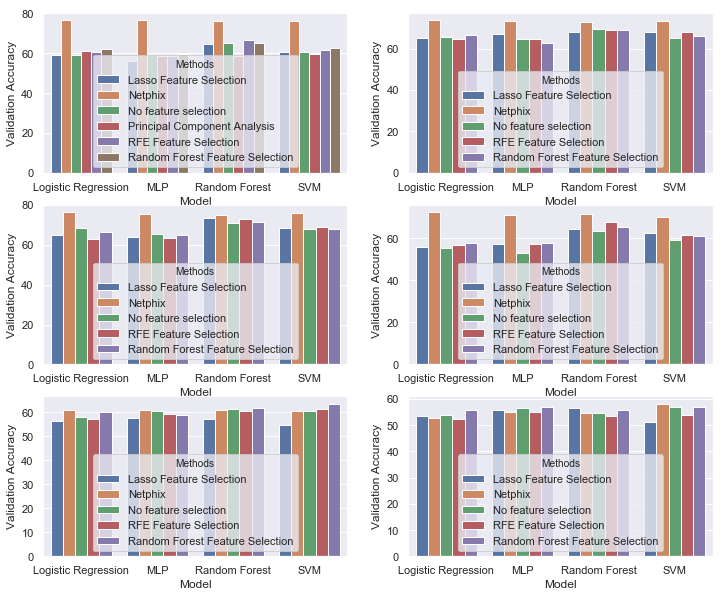

In [183]:
f, axes = plt.subplots(3, 2, figsize = (12,10))

for i,DRUG in enumerate(DRUG_NAMES):
    g = sns.barplot(x = "Model", y = "Validation Accuracy", hue = "Methods", data = to_plot[to_plot["Drug"] == DRUG], ax = axes[int(np.floor(i/2)),int(i%2)])   
    #axes[int(np.floor(i/2)),int(i%2)].title(f"Validation accuracy for {DRUG} for different models and feature selection methods")
    #g._legend.remove()

#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#handles, labels = axes.get_legend_handles_labels()
#axes.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
#fig.legend(handles, labels, loc='upper center')
#labels = ax.get_legend_handles_labels() 
#ax.legend(handles[:0], labels[:0])

plt.show()